In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import json
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Only needed when using Google Colab
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def create_histogram_dataset(histogram_dict: dict):
  histogram_dataset = []
  for key in histogram_dict.keys():
    for histogram in histogram_dict[key]:
      histogram_dataset.append(histogram)
  return histogram_dataset

In [ ]:
def create_label_list(histogram_dict: dict):
  label_vector = []
  for key in histogram_dict.keys():
    for histogram in histogram_dict[key]:
      label_vector.append(key)
  return label_vector

In [ ]:
# read the histogram dictionary saved in file
with open('YOUR_HISTOGRAM_LOCATION_HERE', 'r') as f:
    histogram_dict = json.load(f)

# ensures that the dictionary is sorted by its keys
histogram_dict = dict(sorted(histogram_dict.items()))

In [ ]:
X = create_histogram_dataset(histogram_dict)
y = create_label_list(histogram_dict)

In [ ]:
# Define the classifier
# clf = LogisticRegression(max_iter=1000)
# clf = KNeighborsClassifier(n_neighbors=1)
# clf = DecisionTreeClassifier(random_state=0, max_leaf_nodes=5)
# clf = DecisionTreeClassifier(random_state=0)
# clf = MLPClassifier(hidden_layer_sizes=128, random_state=1)
clf = svm.SVC(kernel='linear', C=1, gamma=2)

# Define the cross-validation strategy
loo = LeaveOneOut()

# Perform leave-one-out cross-validation and make predictions
y_pred = cross_val_predict(clf, X, y, cv=loo)

print(accuracy_score(y, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y, y_pred)

0.7856858846918489


<Axes: >

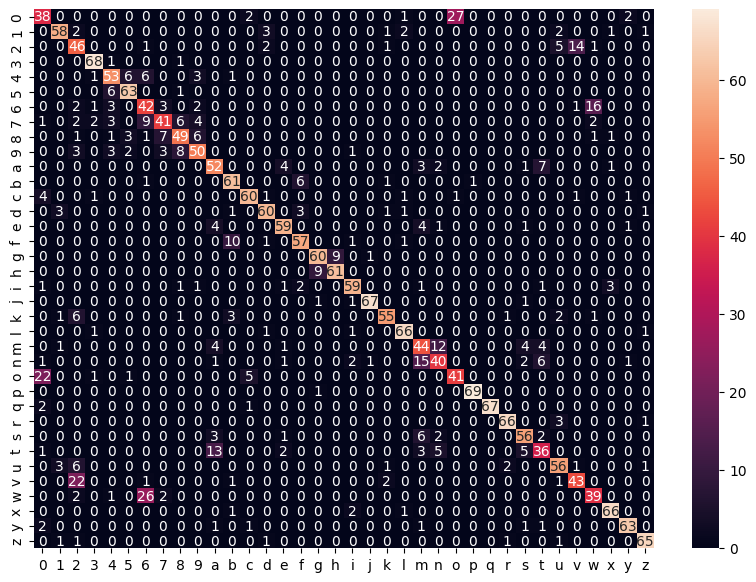

In [ ]:
labels = histogram_dict.keys()
df_cm = pd.DataFrame(cm, labels, labels)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)